https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

Citation
Iranian Churn [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5JW3Z.

This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months.

Dataset Information
Additional Information

This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset
are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

In [96]:
#Importing libraries
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

In [97]:
#Loading data
df=pd.read_csv("Customer-Churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [98]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [99]:
#Data cleaning
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [100]:
df.duplicated().sum()

np.int64(300)

In [101]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Churn', ylabel='count'>

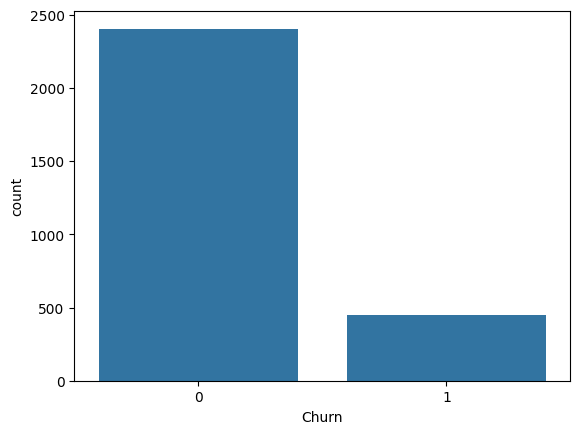

In [102]:
#Inspect Data
# Check class distribution
sns.countplot(data=df, x='Churn')

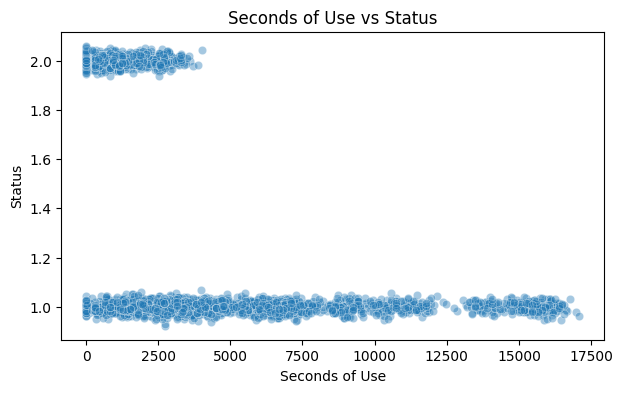

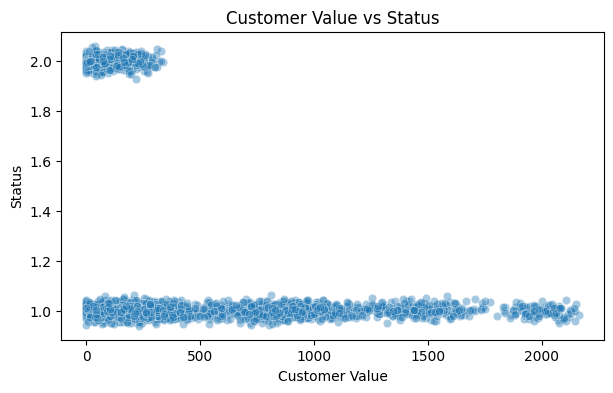

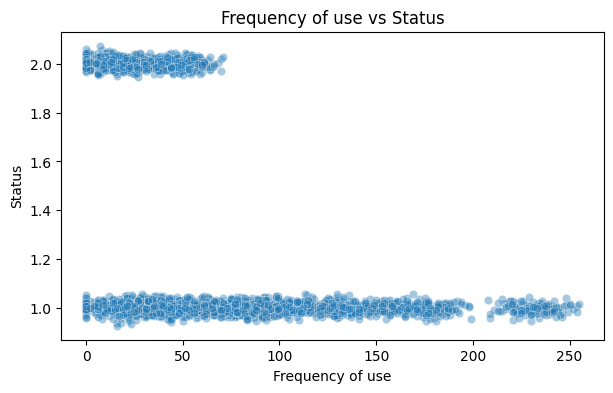

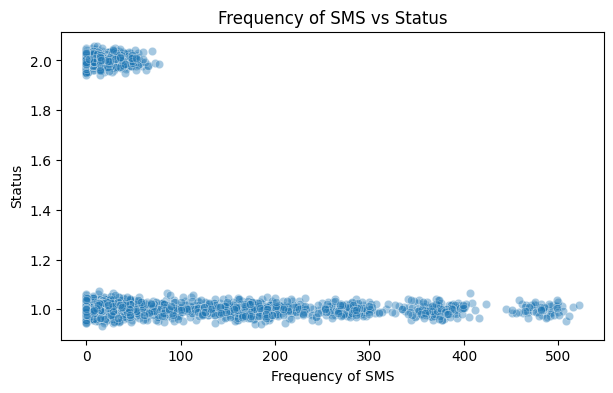

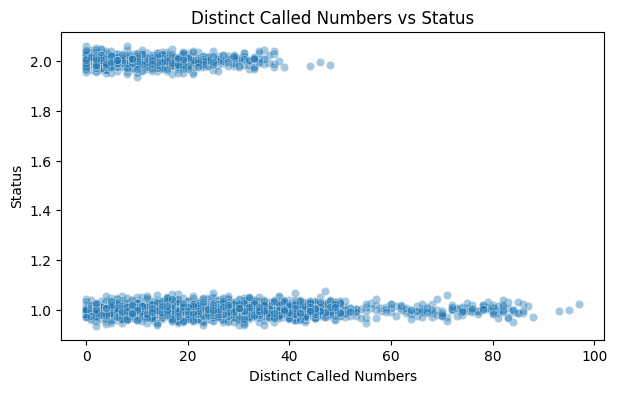

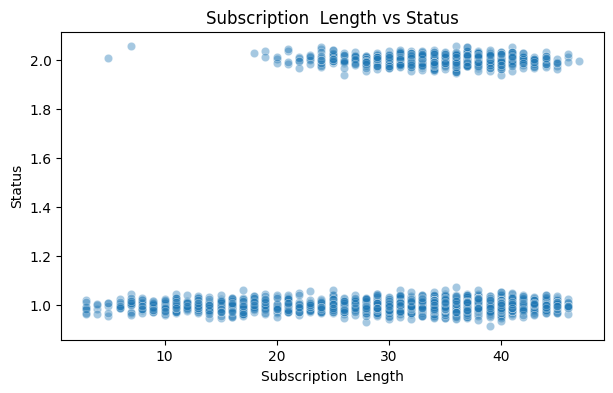

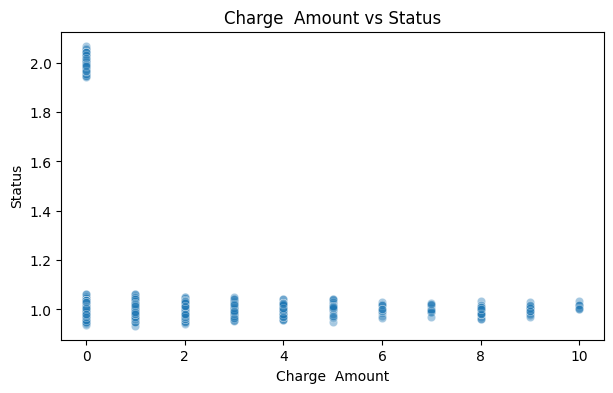

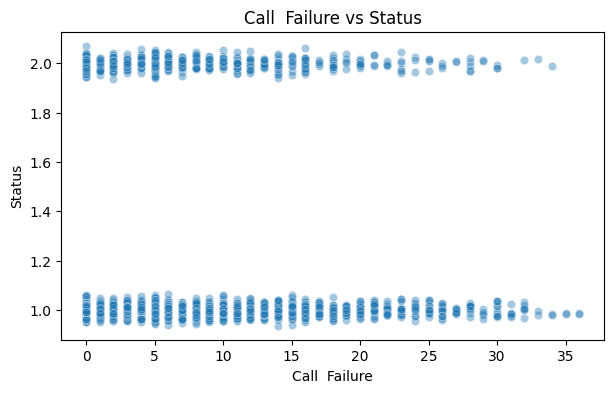

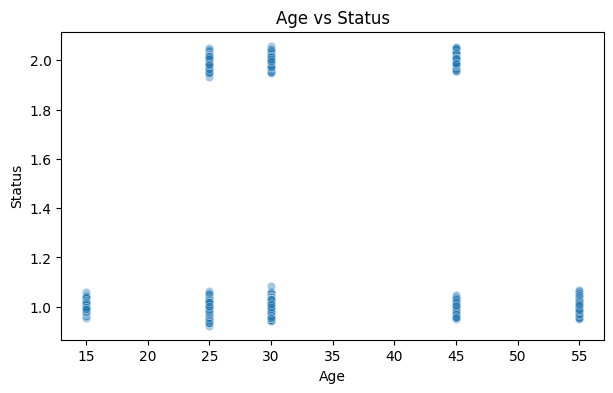

In [103]:
numeric_cols = [
    "Seconds of Use", "Customer Value", "Frequency of use",
    "Frequency of SMS", "Distinct Called Numbers",
    "Subscription  Length", "Charge  Amount", "Call  Failure", "Age"
]

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.scatterplot(
        x=df[col],
        y=df["Status"] + np.random.normal(0, 0.02, len(df)),  
        alpha=0.4
    )
    plt.title(f"{col} vs Status")
    plt.show()


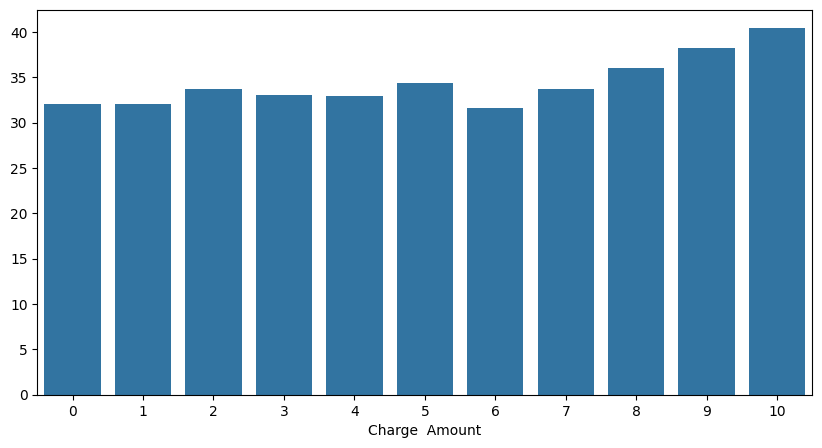

In [104]:
dfg = df.groupby("Charge  Amount")["Subscription  Length"].mean().sort_values(ascending=True)  
plt.figure(figsize=(10,5))
sns.barplot(x=dfg.index, y=dfg.values)
#sns.lineplot(x=dfg.index, y=dfg.values, color='red', marker='o')
plt.show()

<Axes: >

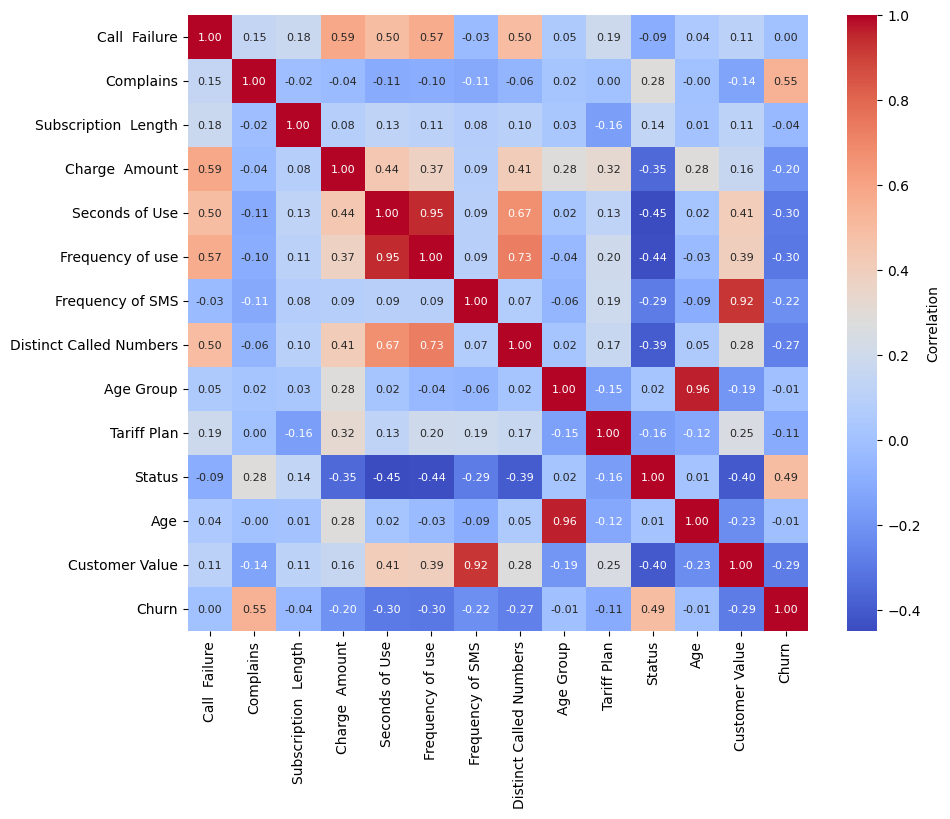

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(),
    annot=True,                # show numbers
    fmt=".2f",                 # format numbers
    cmap="coolwarm",           # color scheme
    annot_kws={"size": 8},     # text size inside cells
    cbar_kws={'label': 'Correlation'}  # colorbar label
)


📌 REGRESSION PERFORMANCE REPORT
--------------------------------
R² Score: 0.9800
MAE: 38.9894
MSE: 5279.5758
RMSE: 72.6607

📌 FEATURE COEFFICIENTS (Impact on Customer Value):
                   Feature  Coefficient
7              Tariff Plan    43.723467
4         Frequency of SMS     4.014055
1     Subscription  Length     0.365068
2           Seconds of Use     0.043583
5  Distinct Called Numbers     0.021141
3         Frequency of use    -0.285217
0                Complains    -0.864848
8                      Age    -7.204893
6                Age Group   -16.014353


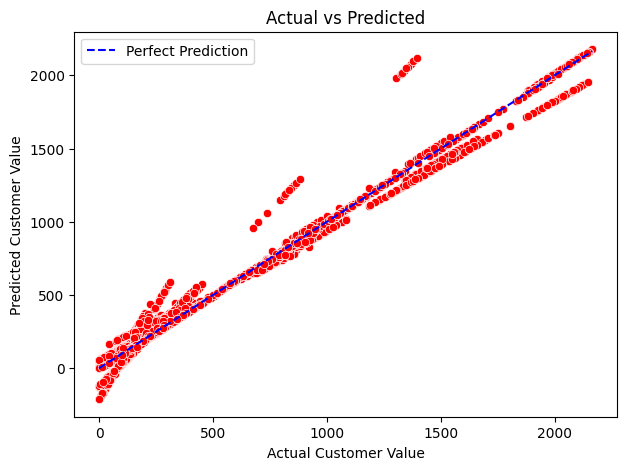

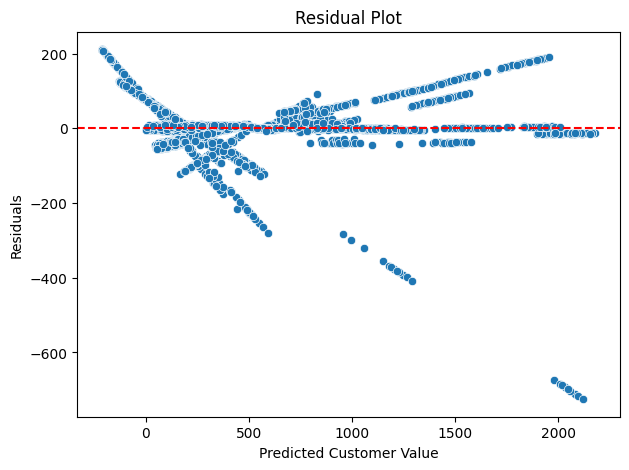

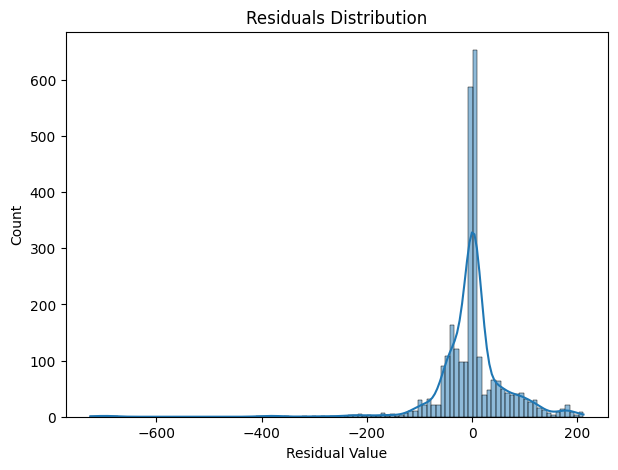

In [106]:
# -------------------------------
# 1. Prepare Data
# -------------------------------

X1 = df.drop(["Churn","Customer Value","Status","Charge  Amount","Call  Failure"], axis=1)
y1 = df["Customer Value"]

# Feature Scaling
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# -------------------------------
# 2. Train Model
# -------------------------------
mdl = LinearRegression()
mdl.fit(X1, y1)

# Predictions
pred = mdl.predict(X1)

# -------------------------------
# 3. Regression Metrics
# -------------------------------
r2 = r2_score(y1, pred)
mae = mean_absolute_error(y1, pred)
mse = mean_squared_error(y1, pred)
rmse = np.sqrt(mse)

print("\n📌 REGRESSION PERFORMANCE REPORT")
print("--------------------------------")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# -------------------------------
# 4. Coefficients Table
# -------------------------------
coef_df = pd.DataFrame({
    "Feature": X1.columns,
    "Coefficient": mdl.coef_
}).sort_values("Coefficient", ascending=False)

print("\n📌 FEATURE COEFFICIENTS (Impact on Customer Value):")
print(coef_df)

# -------------------------------
# 5. Actual vs Predicted Plot
# -------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x=y1, y=pred, color='red')

# Perfect prediction line
line = np.linspace(min(y1), max(y1), 100)
plt.plot(line, line, color='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Customer Value")
plt.ylabel("Predicted Customer Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


# -------------------------------
# 6. Residuals
# -------------------------------
residuals = y1 - pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Customer Value")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# -------------------------------
# 7. Distribution of Residuals
# -------------------------------
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual Value")
plt.show()


In [107]:
# -------------------------------------------
# Separate features & target
# -------------------------------------------

X = df.drop("Churn", axis=1)
y = df["Churn"]

In [108]:
# -------------------------------------------
# Scale numeric features (optional but improves ML performance)
# -------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Final shape of features:", X_scaled.shape)

Final shape of features: (2850, 13)


In [109]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2,       # 20% test
    random_state=42,
    stratify=y           # keep churn % same in train & test
)

In [110]:
# -------------------------------------------
# TRAIN ML MODELS
# -------------------------------------------

svc = SVC(kernel='rbf', gamma='scale')          # best general SVC
knc = KNeighborsClassifier()
mnb = GaussianNB()                              # FIXED!
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2, eval_metric="logloss")   # FIX FOR WARNING

models = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}

In [111]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return acc,prec,rec,f1,cr,cm

In [112]:
results = []
for name,clf in models.items():

    current_accuracy,current_precision,current_recall,current_f1,current_classification_report,current_confusion_matrix = train_classifier(clf, X_train,y_train,X_test,y_test)
    results.append([name, current_accuracy, current_precision, current_recall, current_f1])

# Convert results to table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

print("\n\nMODEL PERFORMANCE COMPARISON:")
results_df



MODEL PERFORMANCE COMPARISON:


,Model,Accuracy,Precision,Recall,F1 Score
0,SVC,0.933333,0.932203,0.617978,0.743243
1,KN,0.947368,0.831461,0.831461,0.831461
2,NB,0.715789,0.344681,0.910112,0.500000
3,DT,0.912281,0.800000,0.584270,0.675325
4,LR,0.903509,0.826923,0.483146,0.609929
5,RF,0.957895,0.922078,0.797753,0.855422
6,AdaBoost,0.917544,0.828125,0.595506,0.692810
7,BgC,0.957895,0.911392,0.808989,0.857143
8,ETC,0.963158,0.935897,0.820225,0.874251
9,GBDT,0.926316,0.861538,0.629213,0.727273


                    Feature  Importance
1                 Complains    0.182902
2      Subscription  Length    0.124835
4            Seconds of Use    0.115648
10                   Status    0.112480
5          Frequency of use    0.105789
12           Customer Value    0.092864
7   Distinct Called Numbers    0.075070
0             Call  Failure    0.067220
6          Frequency of SMS    0.045320
8                 Age Group    0.027048
11                      Age    0.026493
3            Charge  Amount    0.022950
9               Tariff Plan    0.001381


C:\Users\Home\AppData\Local\Temp\ipykernel_2852\2953322145.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


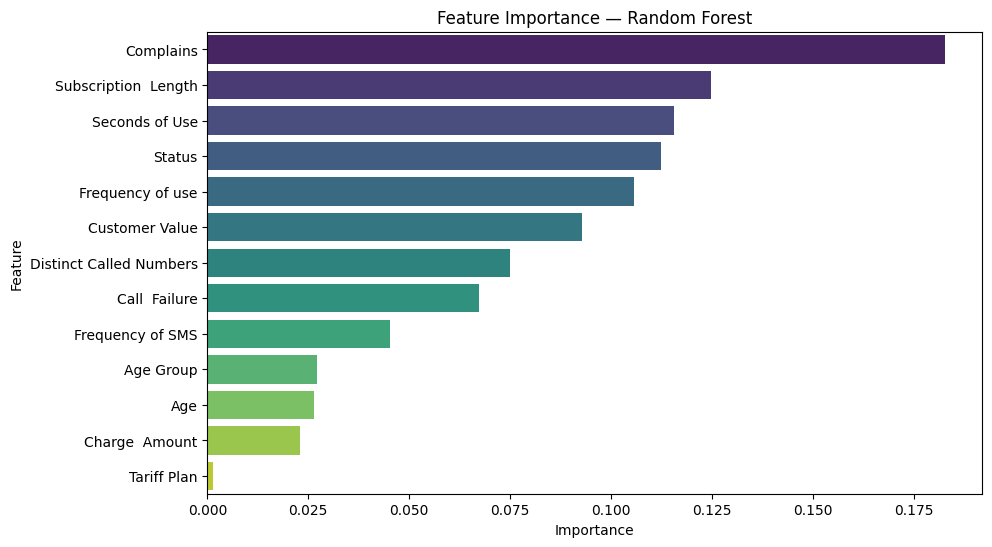

In [113]:
# Get feature importances
importances = rfc.feature_importances_
features = X.columns

# Create DataFrame
feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_df)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance — Random Forest")
plt.show()


C:\Users\Home\AppData\Local\Temp\ipykernel_2852\4025310363.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_et_df, palette='magma')


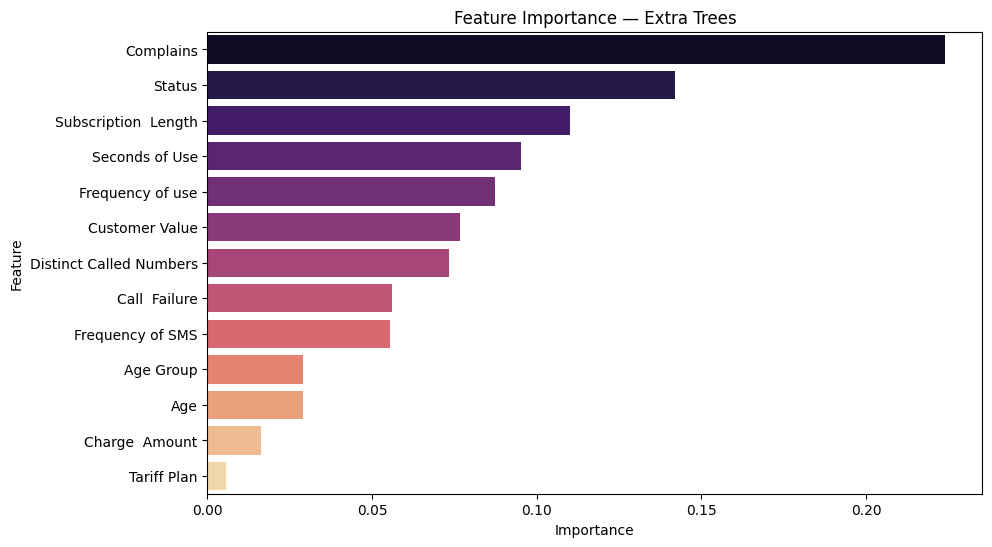

In [114]:
# Extra Trees
importances_et = etc.feature_importances_
feat_et_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_et
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_et_df, palette='magma')
plt.title("Feature Importance — Extra Trees")
plt.show()


Step 1 — Look at F1 Score
--------------------------
Highest F1 Score = XGB → 0.881356
Second highest = ETC → 0.874251
Third = Bagging → 0.857143
✅ So XGBoost (XGB) is the best model according to F1 Score.

Step 2 — Check Accuracy, Precision, Recall
------------------------------------------
Accuracy: XGB (0.963158) and ETC (0.963158) are the highest.
Precision: ETC (0.935897) is slightly higher than XGB (0.886364).
Recall: XGB (0.876404) is higher than ETC (0.820225).
For churn prediction, Recall is very important because you don’t want to miss customers who may churn.
XGB has higher recall than ETC, which makes it more suitable for predicting churn.

✅ Conclusion
--------------
Best Model Overall: XGBoost (XGB)
Reason: Highest F1 Score + High Recall (important for churn detection)
ETC and Bagging are close second choices.

In [115]:
# Save the trained Linear Regression model
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(mdl, f)

# Save scaler
with open("scaler_regression.pkl", "wb") as f:
    pickle.dump(scaler1, f)

# Save X columns
with open("model_columns_regression.pkl", "wb") as f:
    pickle.dump(X1.columns.tolist(), f)

# Save best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save X columns
with open("model_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("✅ Model and scaler saved!")

✅ Model and scaler saved!
